In [1]:
from rembg import remove
import cv2

In [2]:
input_path = 'rembg/denim.png'
output_path = 'rembg/output_denim.png'

input = cv2.imread(input_path)
output = remove(input)
cv2.imwrite(output_path, output)

True

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import colorsys
import seaborn as sns
from colorthief import ColorThief
from collections import Counter
from sklearn.cluster import KMeans
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np

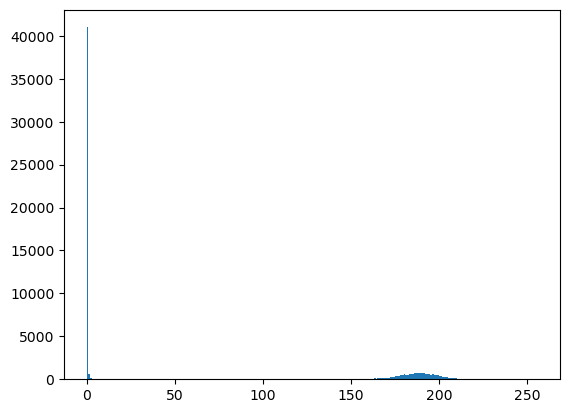

In [4]:
img = cv2.imread('rembg/output_denim.png',0)
plt.hist(img.ravel(), 256, [0,256]); 
plt.show()

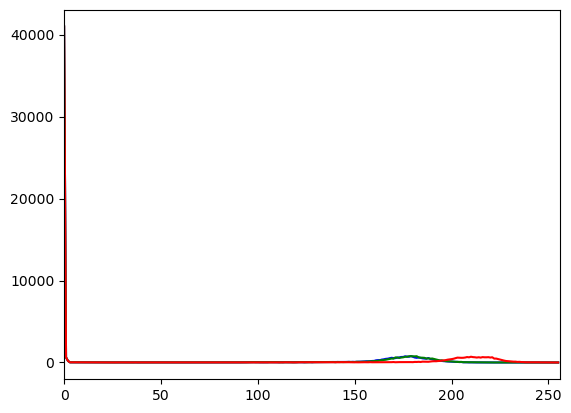

In [5]:
img = cv2.imread('rembg/output_denim.png')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

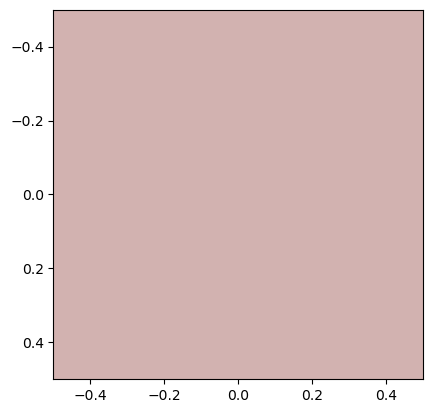

In [6]:
ct = ColorThief("rembg/output_denim.png")
dominant_color = ct.get_color(quality=1)
plt.imshow([[dominant_color]])
plt.show()

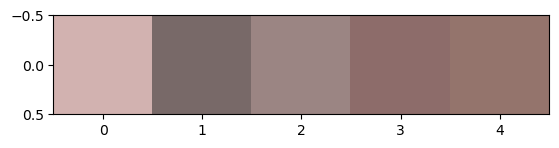

In [7]:
palette = ct.get_palette(color_count=5)
plt.imshow([[palette[i] for i in range(5)]])
plt.show()

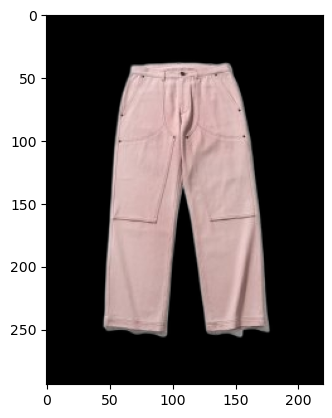

In [8]:
image = cv2.imread('rembg/output_denim.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [9]:
im = Image.open('rembg/output_denim.png')
rgb_im = im.convert('RGB')
r, g, b = rgb_im.getpixel((1, 1))

print(r, g, b)

0 0 0


In [10]:
import extcolors
from PIL import Image


img = Image.open("rembg/output_denim.png")
colors, pixel_count = extcolors.extract_from_image(img)
pixel_output = 0
b = []
for c in colors:
    pixel_output += c[1]
    b.append(list(c))
    print(f'{c[0]} : {round((c[1] / pixel_count) * 100, 2)}% ({c[1]})')


(212, 181, 179) : 33.61% (21740)
(1, 1, 1) : 2.35% (1519)
(114, 79, 77) : 0.66% (425)


In [11]:
b = list(b[0][0])

In [12]:
b

[212, 181, 179]

In [13]:
import csv
d = {}
with open('ral_standard.csv', mode='r') as f:
    data = csv.reader(f)
    color = {rows[0]:list(map(int, rows[1:4])) for rows in data}
print(color)   

{'Green beige': [190, 189, 127], 'Beige': [194, 176, 120], 'Sand yellow': [198, 166, 100], 'Signal yellow': [229, 190, 1], 'Golden yellow': [205, 164, 52], 'Honey yellow': [169, 131, 7], 'Maize yellow': [228, 160, 16], 'Daffodil yellow': [220, 156, 0], 'Brown beige': [138, 102, 66], 'Lemon yellow': [199, 180, 70], 'Oyster white': [234, 230, 202], 'Ivory': [225, 204, 79], 'Light ivory': [230, 214, 144], 'Sulfur yellow': [237, 255, 33], 'Saffron yellow': [245, 208, 51], 'Zinc yellow': [248, 243, 53], 'Grey beige': [158, 151, 100], 'Olive yellow': [153, 153, 80], 'Rape yellow': [243, 218, 11], 'Traffic yellow': [250, 210, 1], 'Ochre yellow': [174, 160, 75], 'Luminous yellow': [255, 255, 0], 'Curry': [157, 145, 1], 'Melon yellow': [244, 169, 0], 'Broom yellow': [214, 174, 1], 'Dahlia yellow': [243, 165, 5], 'Pastel yellow': [239, 169, 74], 'Pearl beige': [106, 93, 77], 'Pearl gold': [112, 83, 53], 'Sun yellow': [243, 159, 24], 'Yellow orange': [237, 118, 14], 'Red orange': [201, 60, 32], '

In [14]:
b

[212, 181, 179]

In [15]:
import math
mins = []

for i in range(len(color)):
    col_key = []
    #print(list(color.values())[i][0])
    s = math.sqrt(abs((b[0]-list(color.values())[i][0])**2 +\
                  (b[1]-list(color.values())[i][1])**2 +\
                  (b[2]-list(color.values())[i][2])**2))

    mins.append(s)
    v = mins.index(min(mins))
    col_key = list(color.keys())[v]
    #print(list(color.keys())[v])
    #s_min = min(s)
    #mins.append(int(s))
    #print(type(mins))
    #print(mins)
    #print('-'*50)
    #print(min(mins))

print(col_key)

Silk grey


In [16]:
b

[212, 181, 179]